In [2]:
import sys
if not '/home/pop518504/git/gknet-benchmarks' in sys.path:
    sys.path.insert(0, '/home/pop518504/git/gknet-benchmarks')
    
from utils import *
from jax_utils import * 
import seaborn as sns
sns.set_style("darkgrid")
figsize = (23, 10)

super_cells = load_super_cells_from_pickle("/home/pop518504/git/gknet-benchmarks/make_supercells/supercells_108_23328.pickle")

# Load results
## `float64` runs

In [2]:
base_path = "/home/pop518504/dev/benchmark_results_backup/float64/"

ase = load_results_from_pickle(base_path + "ase_nl/ase_nl_runtime.pickle")
jaxmd_pair = load_results_from_pickle(base_path + "jaxmd_pair/jaxmd_pair_runtime.pickle")
jaxmd_nl = load_results_from_pickle(base_path + "jaxmd_nl/jaxmd_nl_runtime.pickle")
jaxmd_gnn = load_results_from_pickle(base_path + "jaxmd_gnn/jaxmd_gnn_runtime.pickle")

float64_results = ase + jaxmd_pair + jaxmd_nl + jaxmd_gnn

## float32 runs

In [3]:
float32_results = load_results_from_pickle("/home/pop518504/dev/benchmark_results_backup/float32/results_float32_benchmarks_100_runs.pickle")

In [4]:
def print_n_max(results: List[Result]):
    
    for key, results_per_calculator in group_by(results, lambda r: r.calculator.description):
        results_per_calculator = list(results_per_calculator)
        description = results_per_calculator[0].calculator.description
        n_max = max([r.n for r in results_per_calculator])
        
        print("{}: n_max = {}".format(description, n_max))

In [5]:
# n_max - float64
print_n_max(float64_results)

ASE Neighbor List: n_max = 23328
GNN Neighbor List (stress=False, stresses=False, jit=False): n_max = 4000
GNN Neighbor List (stress=False, stresses=False, jit=True): n_max = 5324
GNN Neighbor List (stress=False, stresses=True, jit=True): n_max = 1568
GNN Neighbor List (stress=True, stresses=False, jit=True): n_max = 2916
GNN Neighbor List (stress=True, stresses=True, jit=True): n_max = 1568
JAX-MD Neighbor List (stress=False, stresses=False, jit=False): n_max = 10976
JAX-MD Neighbor List (stress=False, stresses=False, jit=True): n_max = 10976
JAX-MD Neighbor List (stress=False, stresses=True, jit=True): n_max = 10976
JAX-MD Neighbor List (stress=True, stresses=False, jit=True): n_max = 10976
JAX-MD Neighbor List (stress=True, stresses=True, jit=True): n_max = 10976
JAX-MD Pair (stress=False, stresses=False, jit=False): n_max = 5324
JAX-MD Pair (stress=False, stresses=False, jit=True): n_max = 13500
JAX-MD Pair (stress=False, stresses=True, jit=True): n_max = 5324
JAX-MD Pair (stress=T

In [6]:
# n_max - float32
print_n_max(float32_results)

GNN Neighbor List (stress=False, stresses=False, jit=False): n_max = 6336
GNN Neighbor List (stress=False, stresses=False, jit=True): n_max = 8788
GNN Neighbor List (stress=False, stresses=True, jit=True): n_max = 2916
GNN Neighbor List (stress=True, stresses=False, jit=True): n_max = 6336
GNN Neighbor List (stress=True, stresses=True, jit=True): n_max = 2916
JAX-MD Neighbor List (stress=False, stresses=False, jit=False): n_max = 15360
JAX-MD Neighbor List (stress=False, stresses=False, jit=True): n_max = 15360
JAX-MD Neighbor List (stress=False, stresses=True, jit=True): n_max = 15360
JAX-MD Neighbor List (stress=True, stresses=False, jit=True): n_max = 15360
JAX-MD Neighbor List (stress=True, stresses=True, jit=True): n_max = 15360
JAX-MD Pair (stress=False, stresses=False, jit=False): n_max = 6912
JAX-MD Pair (stress=False, stresses=False, jit=True): n_max = 15360
JAX-MD Pair (stress=False, stresses=True, jit=True): n_max = 6912
JAX-MD Pair (stress=True, stresses=False, jit=True): n

# 1. All calculators by equal property set
## 1.1 energies, forces, stress, stresses

In [7]:
def plot_efsss(results: List[Result], descriptor=""):
    stress_and_stresses = list(filter(lambda r: "ASE" in r.calculator.description or r.calculator._stress and r.calculator._stresses, results))
    fig, ax = plot_runtimes(plot_title=descriptor, results=stress_and_stresses, shade_by='minmax', figsize=figsize)
    fig.set_visible(True)
    print_n_max(stress_and_stresses)

ASE Neighbor List: n_max = 23328
GNN Neighbor List (stress=True, stresses=True, jit=True): n_max = 1568
JAX-MD Neighbor List (stress=True, stresses=True, jit=True): n_max = 10976
JAX-MD Pair (stress=True, stresses=True, jit=True): n_max = 5324


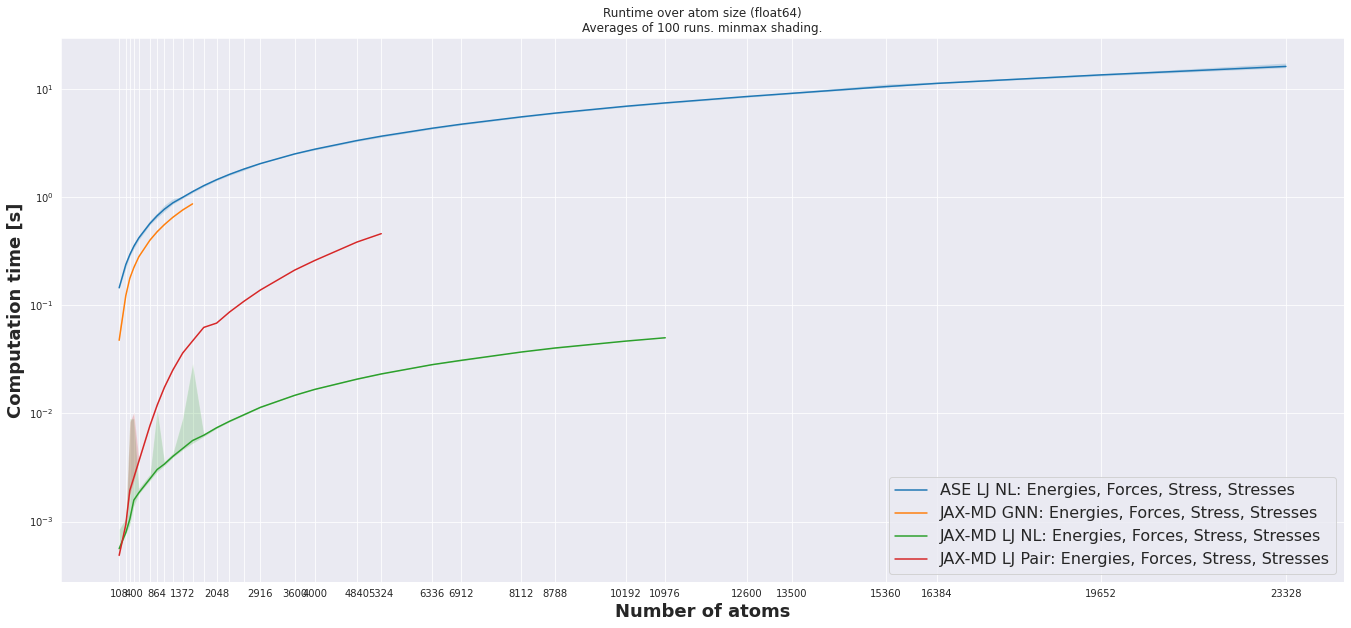

In [8]:
plot_efsss(float64_results, descriptor="Runtime over atom size (float64)")

GNN Neighbor List (stress=True, stresses=True, jit=True): n_max = 2916
JAX-MD Neighbor List (stress=True, stresses=True, jit=True): n_max = 15360
JAX-MD Pair (stress=True, stresses=True, jit=True): n_max = 6912


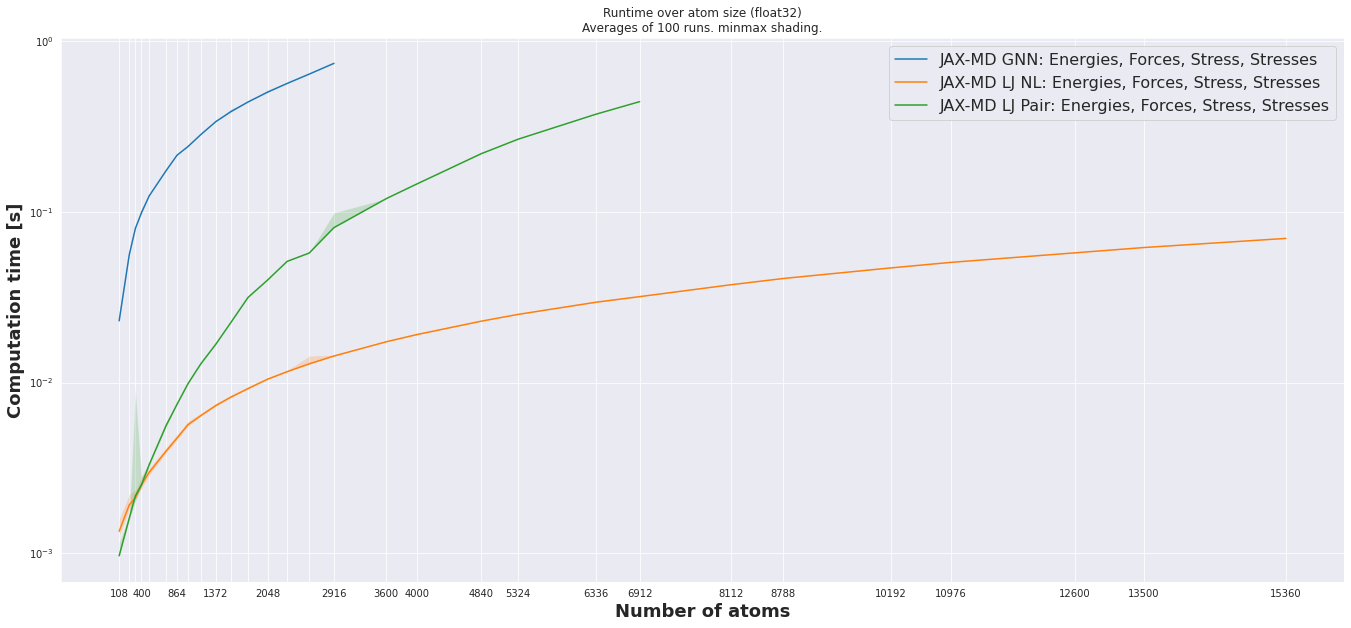

In [18]:
plot_efsss(float32_results, descriptor="Runtime over atom size (float32)")

## 1.2 energies, forces, stress

In [26]:
def plot_efs(results: List[Result], descriptor=""):
    only_stress = list(filter(lambda r: "ASE" not in r.calculator.description and r.calculator._stress and r.calculator._stresses == False, results))
    fig, ax = plot_runtimes(plot_title=descriptor, results=only_stress, shade_by='minmax', figsize=figsize)
    fig.set_visible(True)

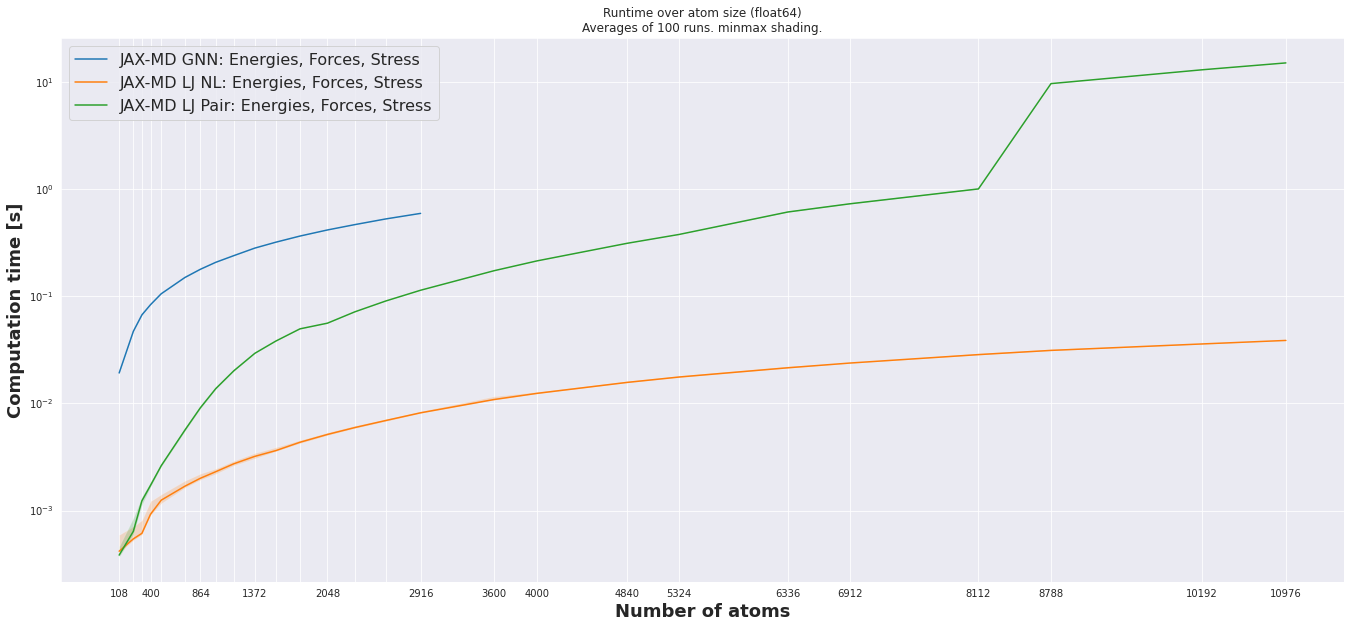

In [27]:
plot_efs(float64_results, descriptor="Runtime over atom size (float64)")

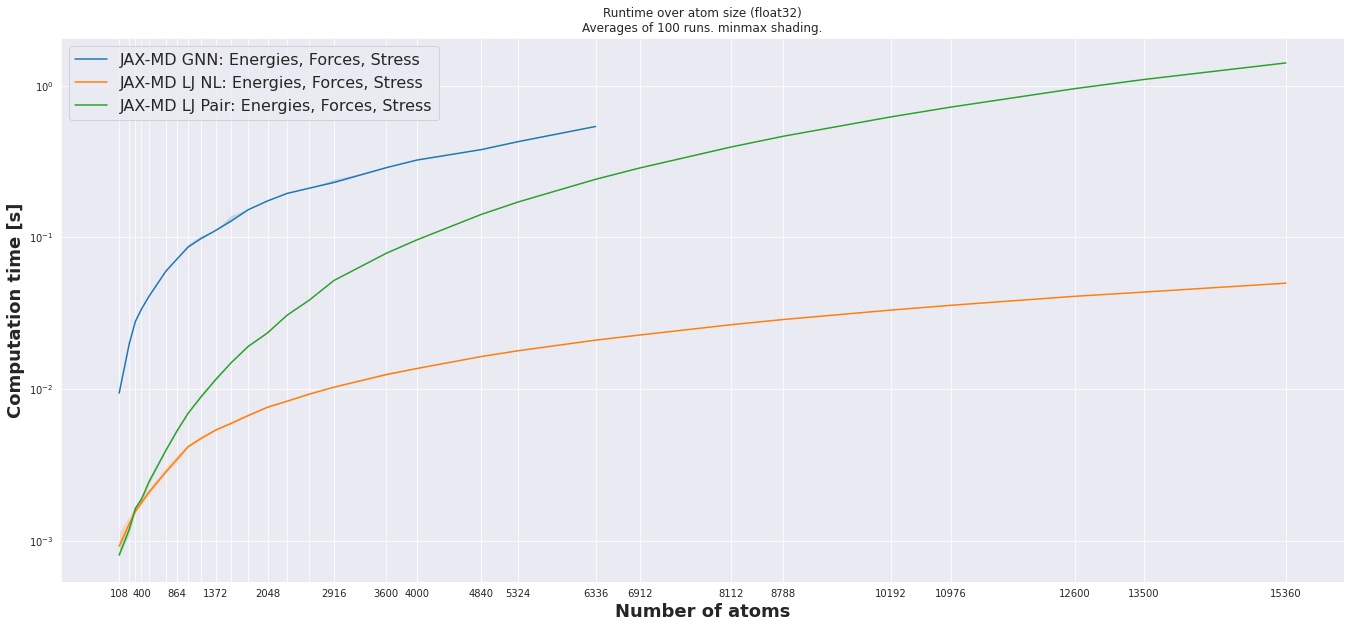

In [28]:
plot_efs(float32_results, descriptor="Runtime over atom size (float32)")

## 1.3 energies, forces, stresses

In [23]:
def plot_efss(results: List[Result], descriptor=""):
    only_stresses = list(filter(lambda r: "ASE" not in r.calculator.description and r.calculator._stress == False and r.calculator._stresses, results))
    fig, ax = plot_runtimes(plot_title=descriptor, results=only_stresses, shade_by='minmax', figsize=figsize)
    fig.set_visible(True)

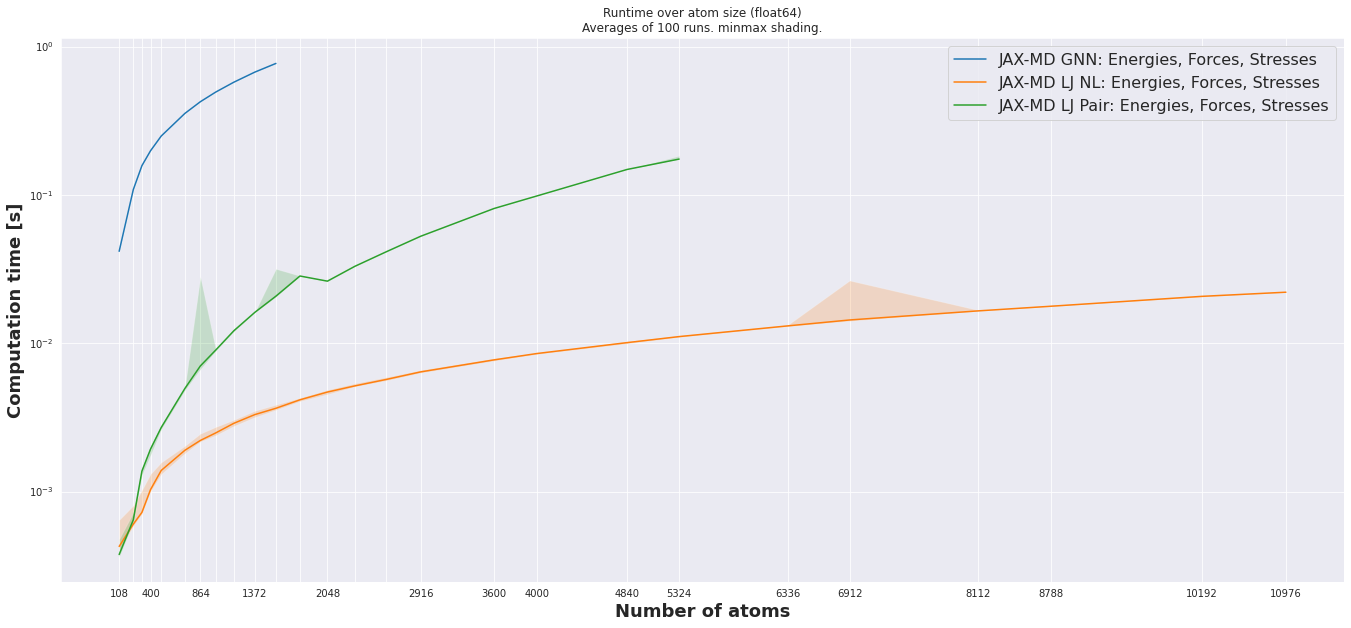

In [24]:
plot_efss(float64_results, descriptor="Runtime over atom size (float64)")

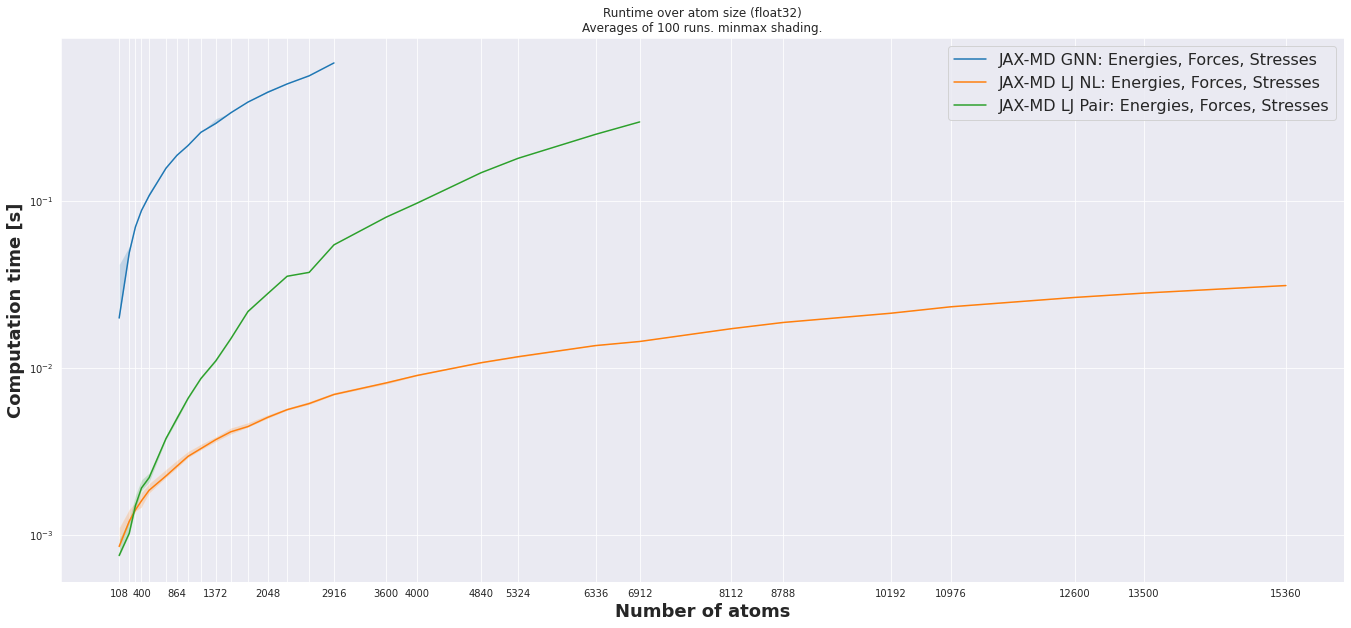

In [25]:
plot_efss(float32_results, descriptor="Runtime over atom size (float32)")

## 1.4 energies, forces

In [29]:
def plot_ef(results: List[Result], descriptor=""):
    no_stresses = list(filter(lambda r: "ASE" not in r.calculator.description and r.calculator._stress == False and r.calculator._stresses == False, results))
    no_stresses = list(filter(lambda r: r.calculator._jit, no_stresses))
    fig, ax = plot_runtimes(results=no_stresses, shade_by='minmax', figsize=figsize)
    fig.set_visible(True)

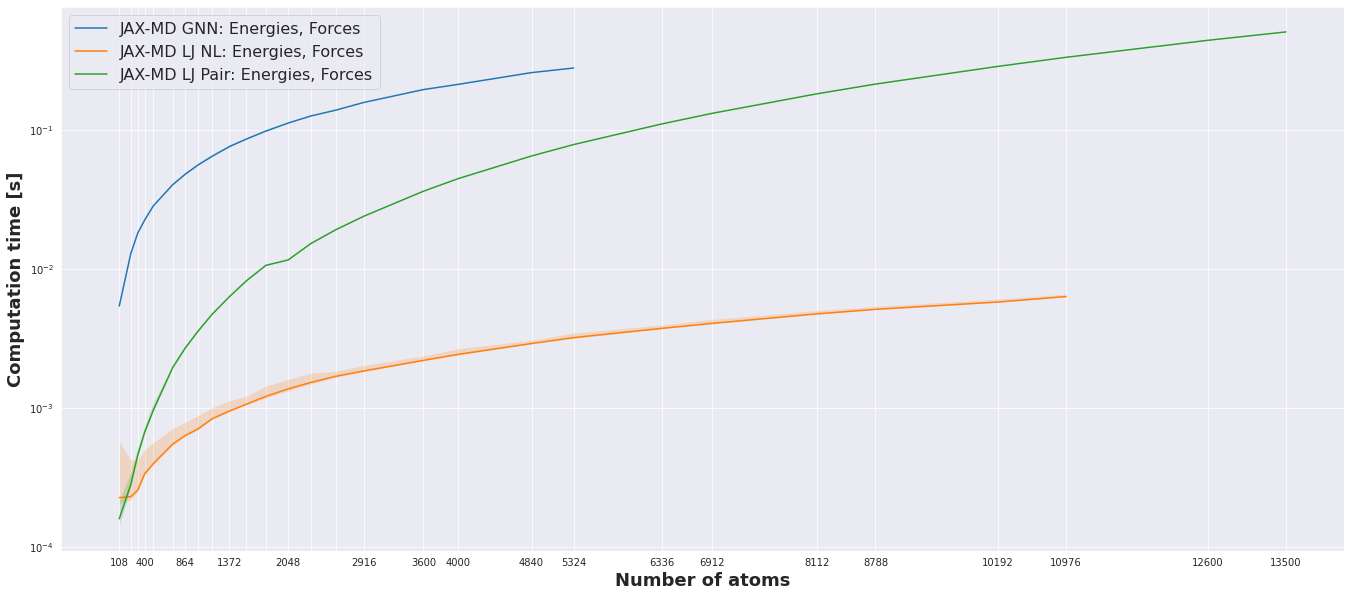

In [30]:
plot_ef(float64_results, descriptor="Runtime over atom size (float64)")

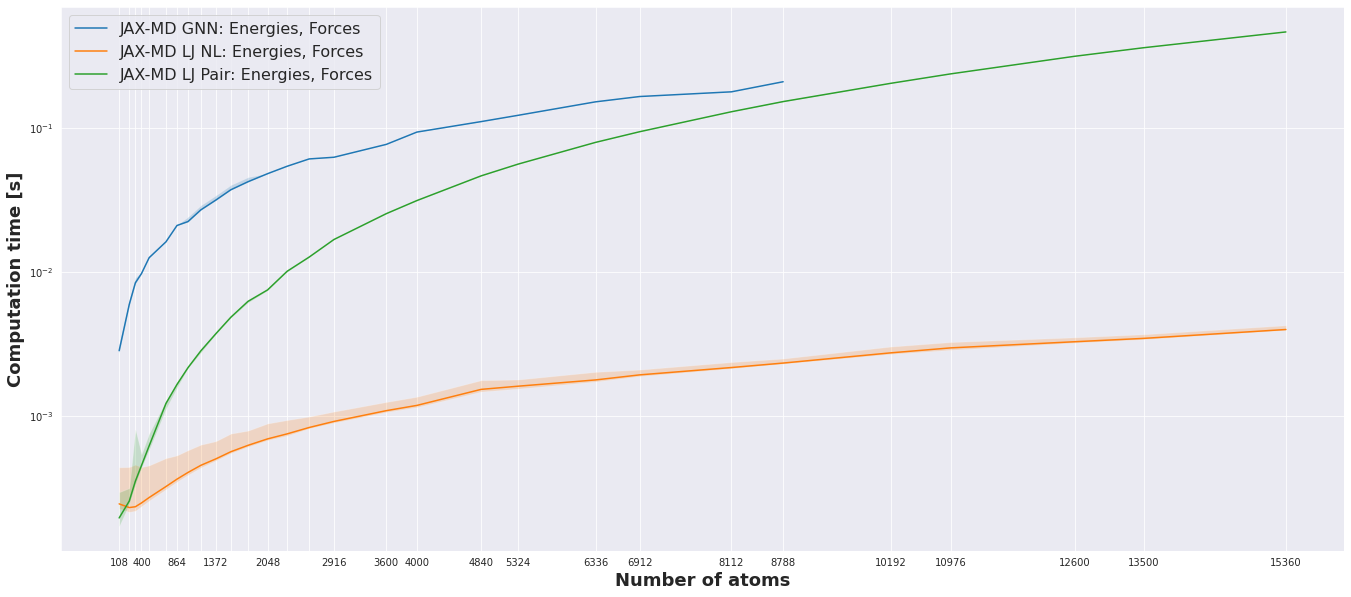

In [31]:
plot_ef(float32_results, descriptor="Runtime over atom size (float32)")

# 2. By calculator
## 2.1 Lennard-Jones NL

In [62]:
def plot_lj_nl(results: List[Result], descriptor=""):
    no_ase = list(filter(lambda r: "ASE" not in r.calculator.description, results))
    jaxmd_nl = list(filter(lambda r: "JAX-MD Neighbor List" in r.calculator._short_description, no_ase))
    jaxmd_nl_jit = list(filter(lambda r: r.calculator._jit, jaxmd_nl))
    
    fig, ax = plot_runtimes(plot_title=descriptor, results=jaxmd_nl_jit, shade_by='minmax', figsize=figsize)
    fig.set_visible(True)

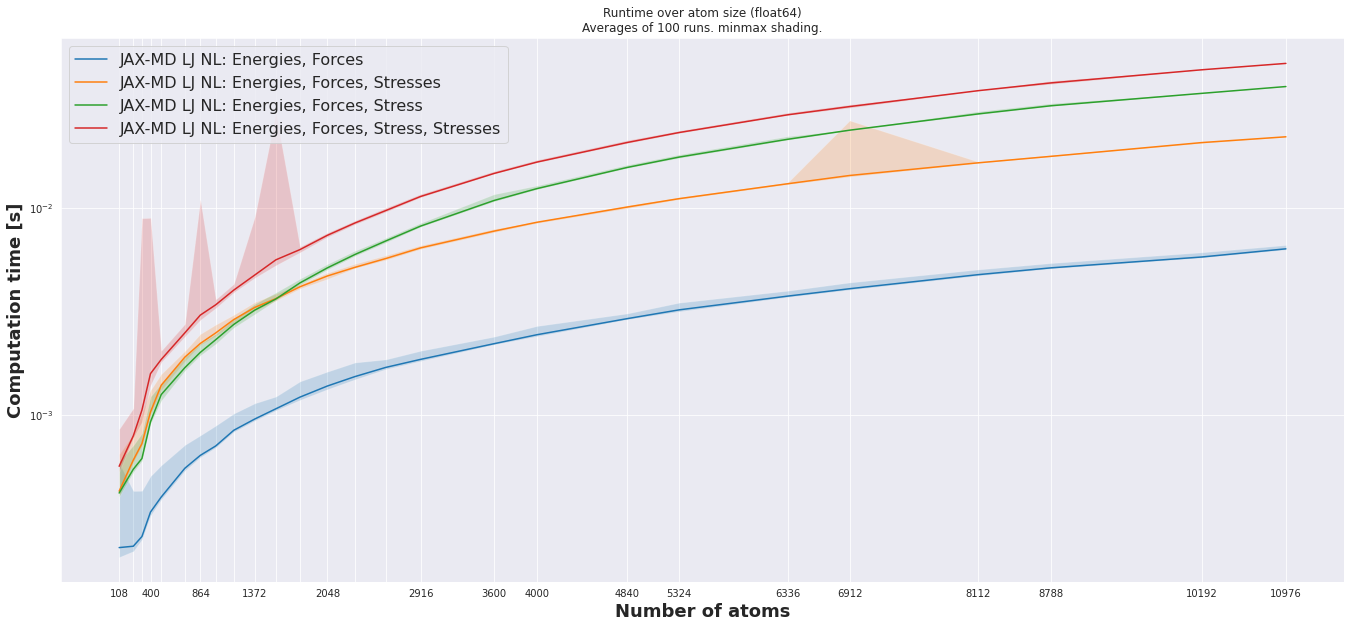

In [63]:
plot_lj_nl(float64_results, descriptor="Runtime over atom size (float64)")

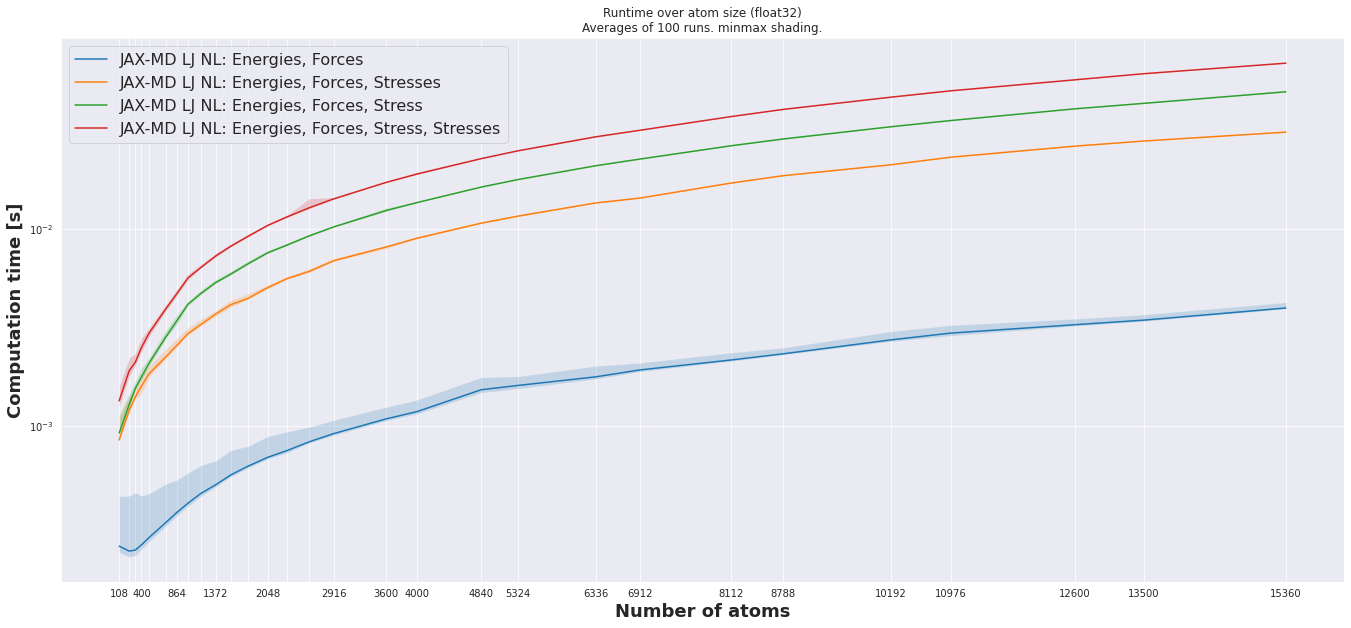

In [64]:
plot_lj_nl(float32_results, descriptor="Runtime over atom size (float32)")

## 2.2 Lennard-Jones Pair

In [68]:
def plot_lj_pair(results: List[Result], descriptor=""):
    no_ase = list(filter(lambda r: "ASE" not in r.calculator.description, results))
    jaxmd_pair = list(filter(lambda r: "JAX-MD Pair" in r.calculator._short_description, no_ase))
    jaxmd_pair_jit = list(filter(lambda r: r.calculator._jit, jaxmd_pair))
    
    fig, ax = plot_runtimes(plot_title=descriptor, results=jaxmd_pair_jit, shade_by='minmax', figsize=figsize)
    fig.set_visible(True)

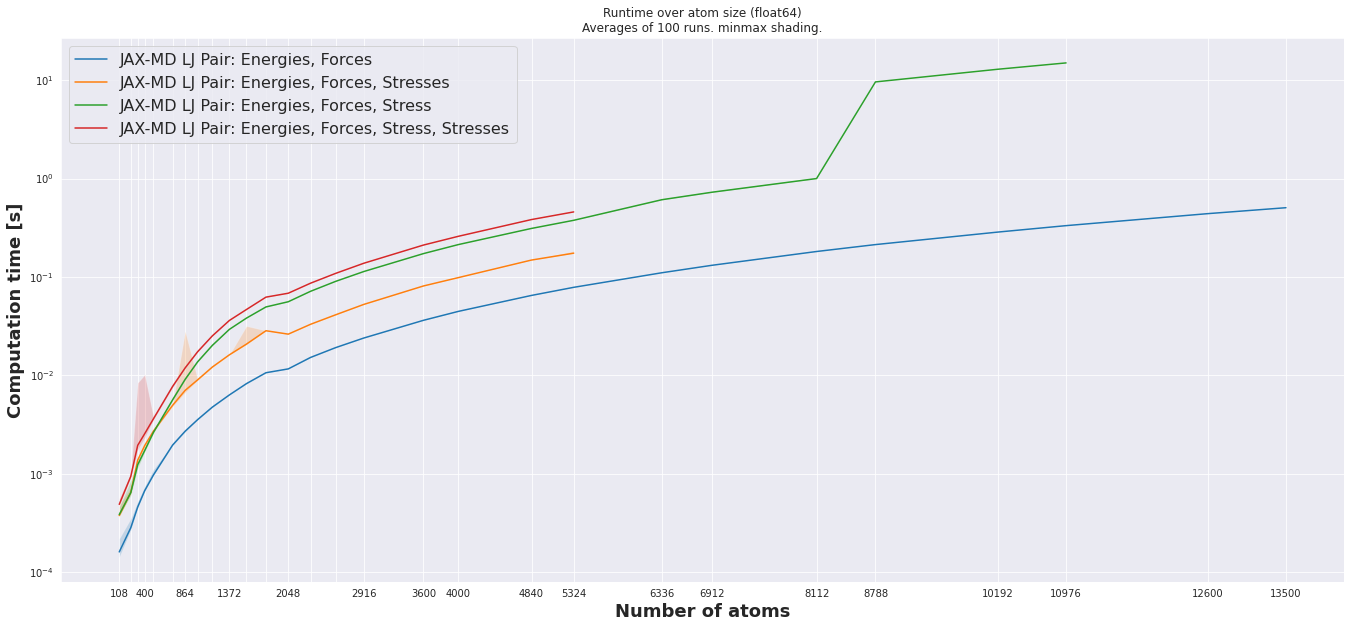

In [69]:
plot_lj_pair(float64_results, descriptor="Runtime over atom size (float64)")

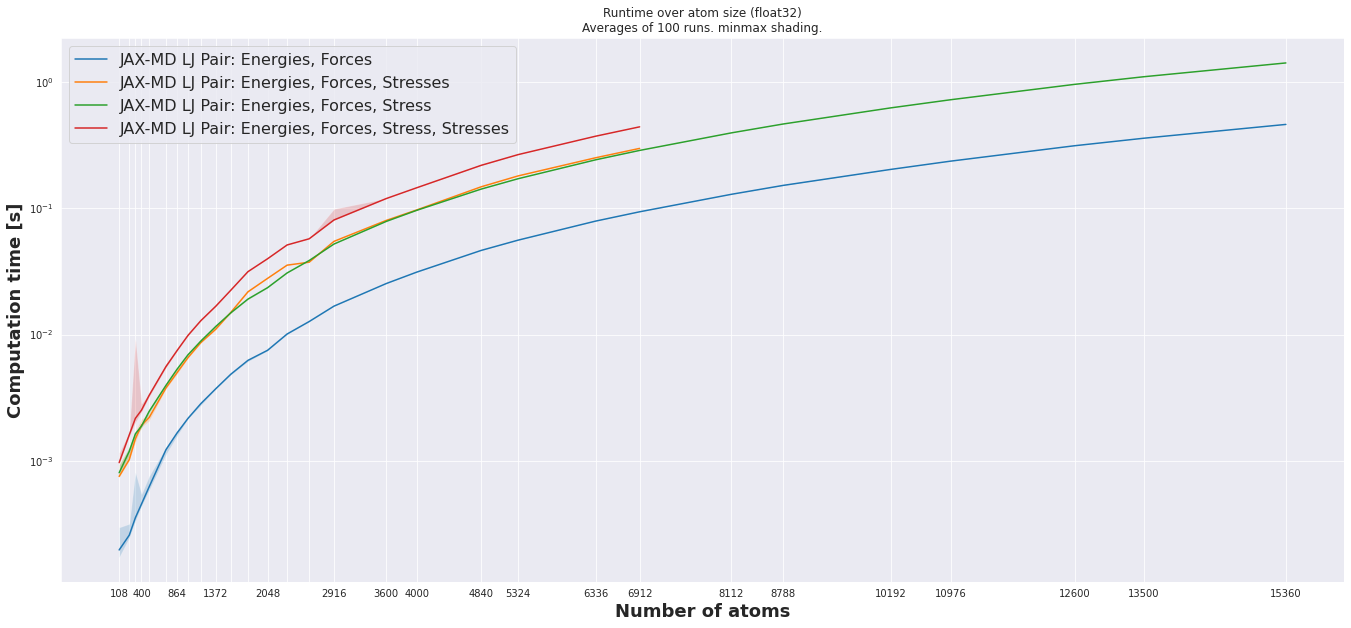

In [70]:
plot_lj_pair(float32_results, descriptor="Runtime over atom size (float32)")

# 3. Gain of `float32` over `float64`
For energies, forces and stress (most interesting combination)

## 3.1 Lennard-Jones NL

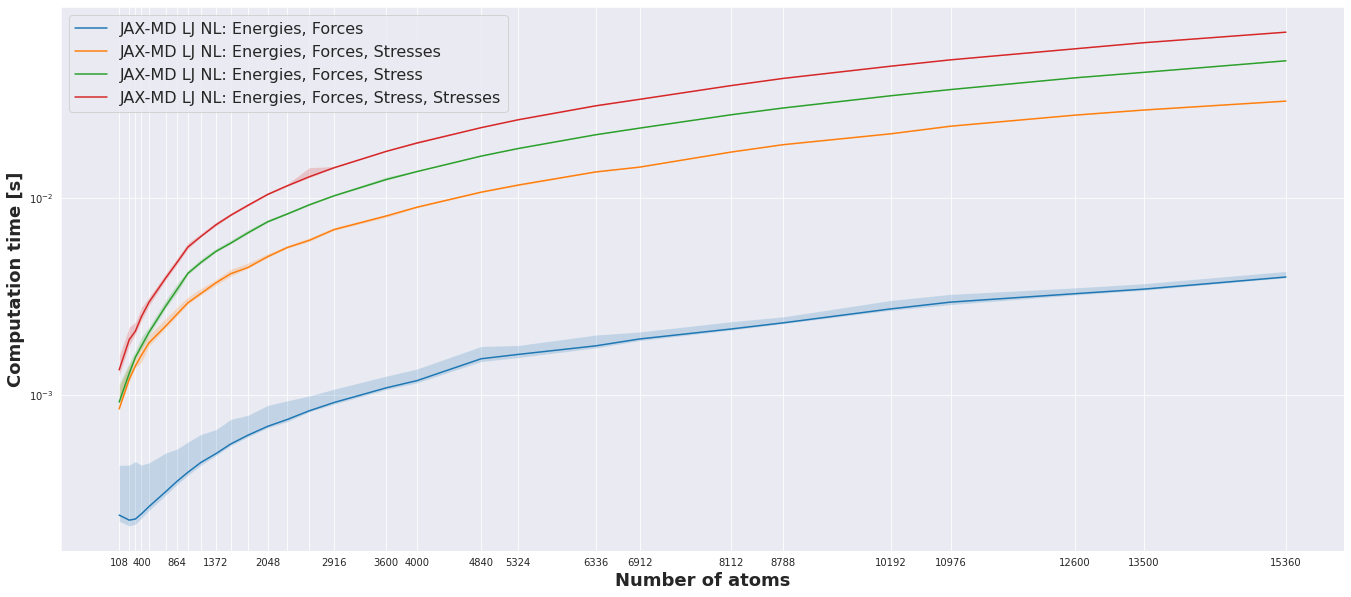

In [78]:
def get_lj_nl_results(results: List[Result]):
    no_ase = list(filter(lambda r: "ASE" not in r.calculator.description, results))
    jaxmd_nl = list(filter(lambda r: "JAX-MD Neighbor List" in r.calculator._short_description, no_ase))
    jaxmd_nl_jit = list(filter(lambda r: r.calculator._jit, jaxmd_nl))
    return jaxmd_nl_jit
    
float32_lj_nl = get_lj_nl_results(float32_results)
for result in float32_lj_nl:
    result.calculator._description = " (float32)"

float64_lj_nl = get_lj_nl_results(float64_results)
    
fig, ax = plot_runtimes(results=float32_lj_nl, shade_by='minmax', figsize=figsize)
fig.set_visible(True)